# Chocolate Bar EDA

![](https://i.ndtvimg.com/i/2015-06/chocolate_625x350_81434346507.jpg)

> Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.
> 
> Flavors of Cacao Rating System:
> * 5= Elite (Transcending beyond the ordinary limits)
> * 4= Premium (Superior flavor development, character and style)
> * 3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
> * 2= Disappointing (Passable but contains at least one significant flaw)
> * 1= Unpleasant (mostly unpalatable)
> 
> Each chocolate is evaluated from a combination of both objective qualities and subjective interpretation. A rating here only represents an experience with one bar from one batch. Batch numbers, vintages and review dates are included in the database when known.
> 
> The database is narrowly focused on plain dark chocolate with an aim of appreciating the flavors of the cacao when made into chocolate. The ratings do not reflect health benefits, social missions, or organic status.
> 
> Flavor is the most important component of the Flavors of Cacao ratings. Diversity, balance, intensity and purity of flavors are all considered. It is possible for a straight forward single note chocolate to rate as high as a complex flavor profile that changes throughout. Genetics, terroir, post harvest techniques, processing and storage can all be discussed when considering the flavor component.
> 
> Texture has a great impact on the overall experience and it is also possible for texture related issues to impact flavor. It is a good way to evaluate the makers vision, attention to detail and level of proficiency.
> 
> Aftermelt is the experience after the chocolate has melted. Higher quality chocolate will linger and be long lasting and enjoyable. Since the aftermelt is the last impression you get from the chocolate, it receives equal importance in the overall rating.
> 
> Overall Opinion is really where the ratings reflect a subjective opinion. Ideally it is my evaluation of whether or not the components above worked together and an opinion on the flavor development, character and style. It is also here where each chocolate can usually be summarized by the most prominent impressions that you would remember about each chocolate.
> 
> *Acknowledgements
> These ratings were compiled by Brady Brelinski, Founding Member of the Manhattan Chocolate Society. For up-to-date information, as well as additional content (including interviews with craft chocolate makers), please see his website: Flavors of Cacao*
> 
> ***Inspiration
> Where are the best cocoa beans grown?
> Which countries produce the highest-rated bars?
> What’s the relationship between cocoa solids percentage and rating?***

# 1. Import 

In [1]:
# System
import os
import sys

# Numerical
import numpy as np
from numpy import median
import pandas as pd


# NLP
import re
from string import ascii_letters


# Tools
import itertools
import pycountry


# Machine Learning - Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# Machine Learning - Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# Machine Learning - Models
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomTreesEmbedding, RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB 
from sklearn.neighbors import KDTree, KNeighborsClassifier, NearestNeighbors
from sklearn.neural_network import BernoulliRBM, MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.mixture import GaussianMixture


# Machine Learning - Evaluation
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.utils import class_weight


# Plot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

print(os.listdir("../input"))

['flavors_of_cacao.csv']


# 2. Read Data

In [2]:
df_org = pd.read_csv("../input/flavors_of_cacao.csv")
df = pd.read_csv("../input/flavors_of_cacao.csv")
df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

# 3. Visualizations

In [4]:
df["Cocoa Percent"] = df["Cocoa\nPercent"].apply(lambda x: (int(float(x[:-1]))//5)*5)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


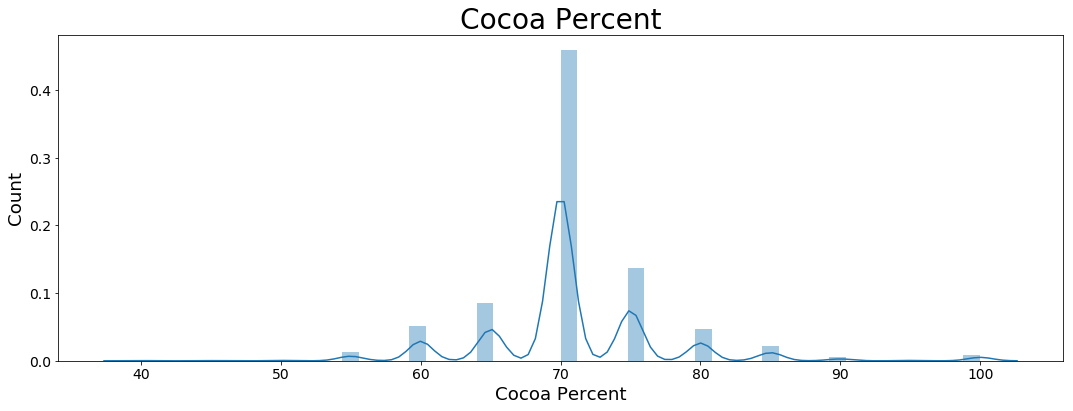

In [5]:
col = "Cocoa Percent"
c = 10
title = re.sub("[^a-zA-Z0-9]", " ", col).title()
xlabel = title
ylabel = "Count"

figsize = (18, 6)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

ax = sns.distplot(df[col])
ax.set_title(title, fontsize=title_fontsize)
ax.set_xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
ax.set_ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
ax.tick_params(labelsize=xtick_fontsize)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


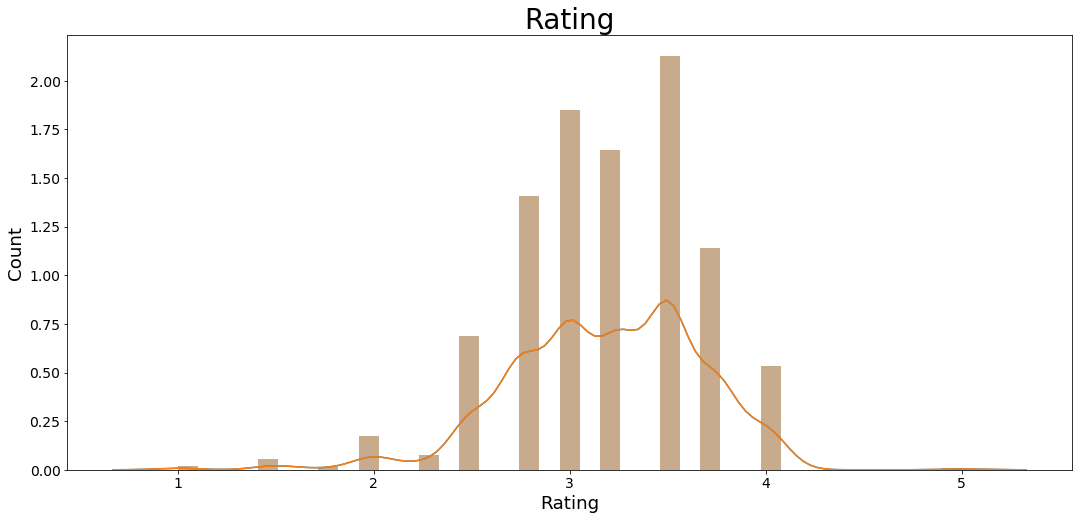

In [6]:
col = "Rating"
c = 10
title = re.sub("[^a-zA-Z0-9]", " ", col).title()
xlabel = title
ylabel = "Count"

figsize = (18, 8)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

sns.distplot(df[col])
ax = sns.distplot(df[col])
ax.set_title(title, fontsize=title_fontsize)
ax.set_xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
ax.set_ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
ax.tick_params(labelsize=xtick_fontsize)

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 11 Text yticklabel objects>)

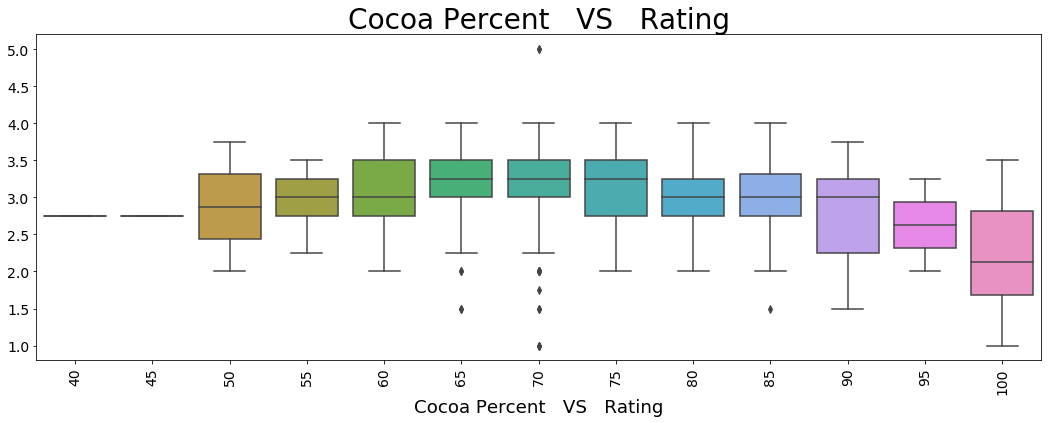

In [7]:
col1 = "Cocoa Percent"
col2 = "Rating"
c = 10
title = re.sub("[^a-zA-Z0-9]", " ", col1).title() + "   VS   " + re.sub("[^a-zA-Z0-9]", " ", col2).title()
xlabel = title
ylabel = ""

figsize = (18, 6)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

ax = sns.boxplot(x=col1, y=col2, data=df)
plt.title(title, fontsize=title_fontsize)
plt.xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
plt.ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
plt.xticks(fontsize=xtick_fontsize, rotation=90)
plt.yticks(fontsize=ytick_fontsize)

In [8]:
def get_city_country(text, region="all", count=1):
    subdivision_list= []
    country_list = []
    region_list = []
    
    if region=="subdivision" or region=="all":
        for subdivision in pycountry.subdivisions:
            if subdivision.name in text: 
                subdivision_list.append(subdivision.name)
                
    if region=="country" or region=="all":
        for country in pycountry.countries:
            if country.name in text: 
                country_list.append(country.name)
                
    if region=="subdivision": 
        return ", ".join(subdivision_list[:count])
    elif region=="country": 
        return ", ".join(country_list[:count])
    else: 
        for i in range(len(subdivision_list)):
            try:
                region_list.append(subdivision_list[i] +", "+ country_list[i])
            except: break
        return " | ".join(region_list[:count])
    

In [9]:
df["Specific Bean Origin Country"] = df["Specific Bean Origin\nor Bar Name"].apply(lambda x: get_city_country(x, "country", 1))
df["Specific Bean Origin Subdivision"] = df["Specific Bean Origin\nor Bar Name"].apply(lambda x: get_city_country(x, "subdivision", 1))
# df["Location"] = df["Specific Bean Origin\nor Bar Name"].apply(lambda x: get_city_country(x, "all", 1))

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text yticklabel objects>)

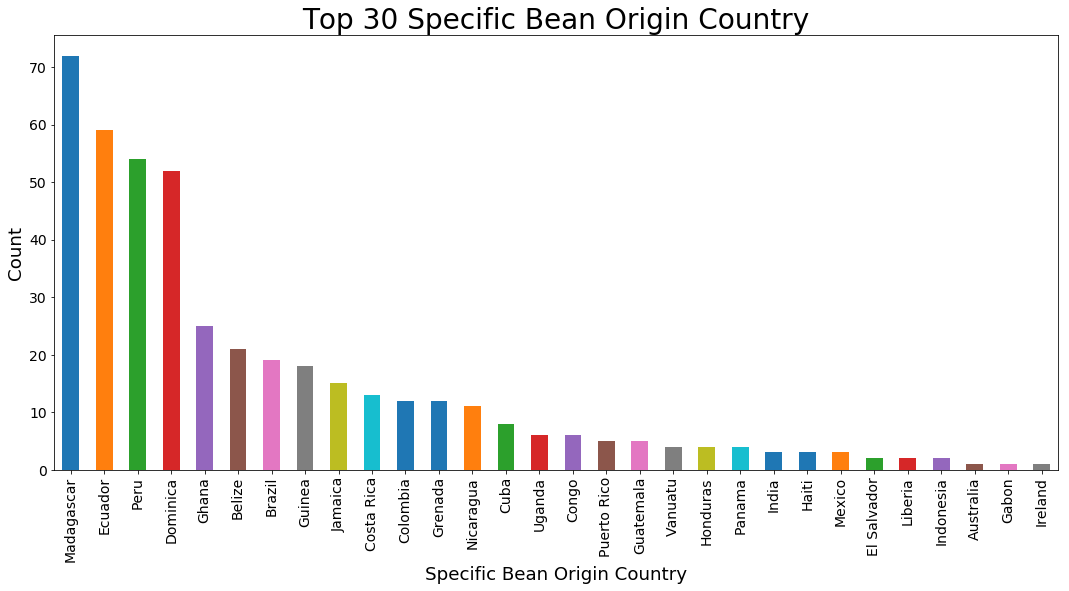

In [10]:
col = "Specific Bean Origin Country"
c = 30
title = col
xlabel = title
ylabel = "Count"

figsize = (18, 8)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)
d = df[df[col]!=""]
d[col].value_counts().sort_values(ascending=False).head(c).plot(kind = 'bar')
plt.title("Top " + str(c) + " " + title, fontsize=title_fontsize)
plt.xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
plt.ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
plt.xticks(fontsize=xtick_fontsize)
plt.yticks(fontsize=ytick_fontsize)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 10 Text yticklabel objects>)

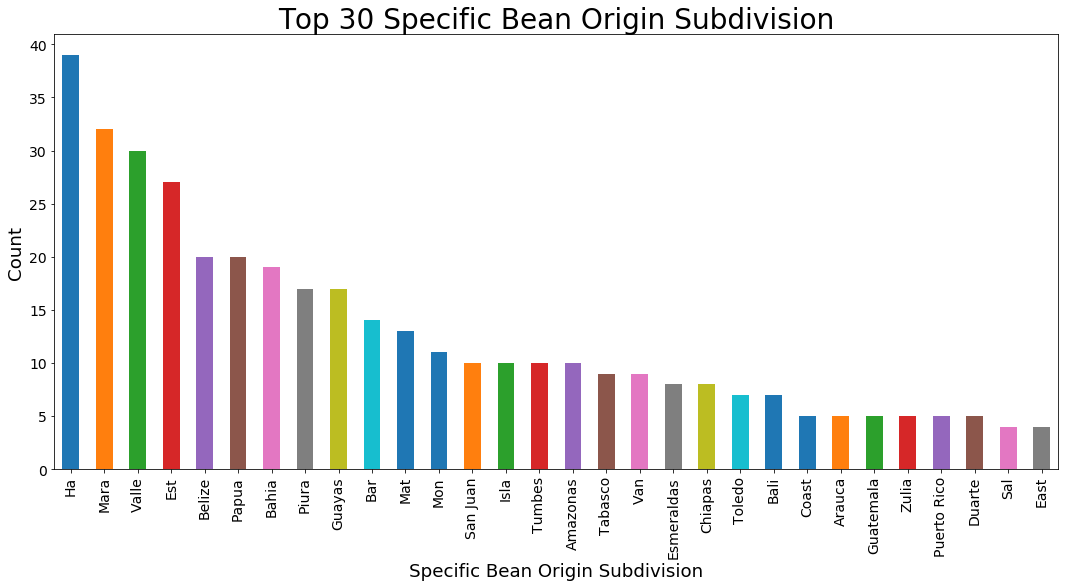

In [11]:
col = "Specific Bean Origin Subdivision"
c = 30
title = col
xlabel = title
ylabel = "Count"

figsize = (18, 8)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)
d = df[df[col]!=""]
d[col].value_counts().sort_values(ascending=False).head(c).plot(kind = 'bar')
plt.title("Top " + str(c) + " " + title, fontsize=title_fontsize)
plt.xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
plt.ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
plt.xticks(fontsize=xtick_fontsize)
plt.yticks(fontsize=ytick_fontsize)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 <a list of 10 Text yticklabel objects>)

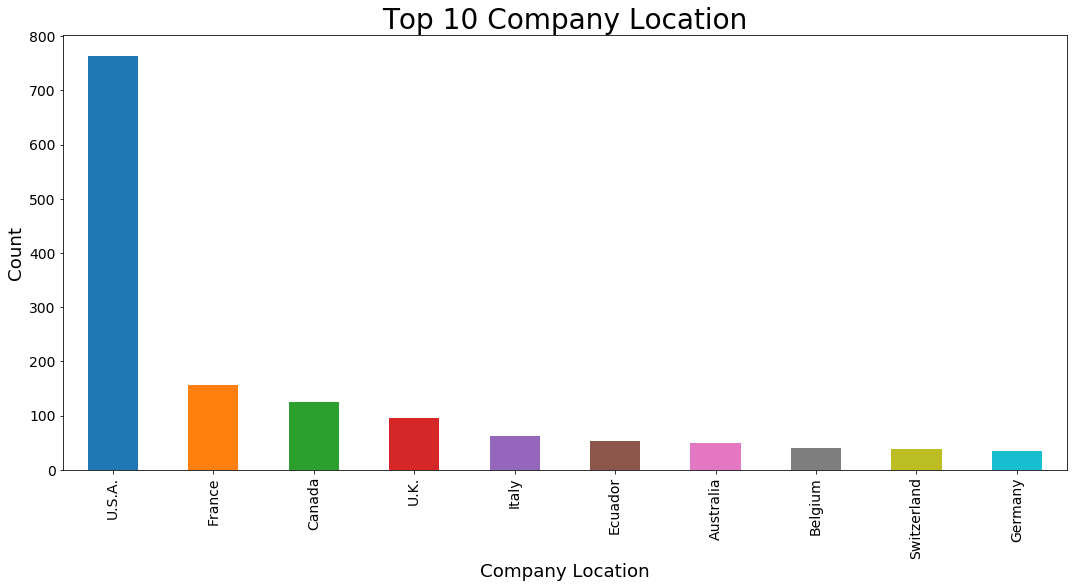

In [12]:
col = "Company\nLocation"
c = 10
title = re.sub("[^a-zA-Z0-9]", " ", col).title()
xlabel = title
ylabel = "Count"

figsize = (18, 8)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

df[col].value_counts().sort_values(ascending=False).head(c).plot(kind = 'bar')
plt.title("Top " + str(c) + " " + title, fontsize=title_fontsize)
plt.xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
plt.ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
plt.xticks(fontsize=xtick_fontsize)
plt.yticks(fontsize=ytick_fontsize)

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 11 Text yticklabel objects>)

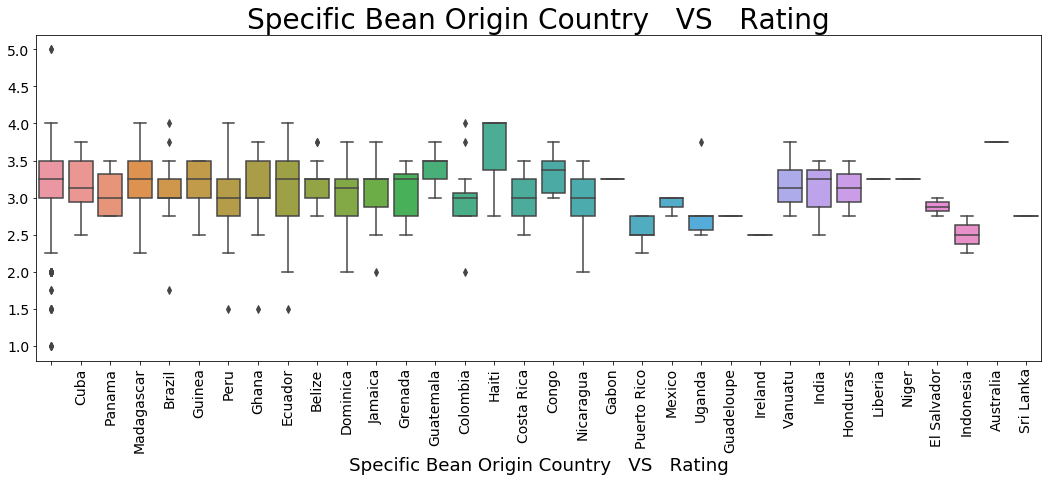

In [13]:
col1 = "Specific Bean Origin Country"
col2 = "Rating"
c = 10
title = re.sub("[^a-zA-Z0-9]", " ", col1).title() + "   VS   " + re.sub("[^a-zA-Z0-9]", " ", col2).title()
xlabel = title
ylabel = ""

figsize = (18, 6)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

ax = sns.boxplot(x=col1, y=col2, data=df)
plt.title(title, fontsize=title_fontsize)
plt.xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
plt.ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
plt.xticks(fontsize=xtick_fontsize, rotation=90)
plt.yticks(fontsize=ytick_fontsize)

(array([ 30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 9 Text yticklabel objects>)

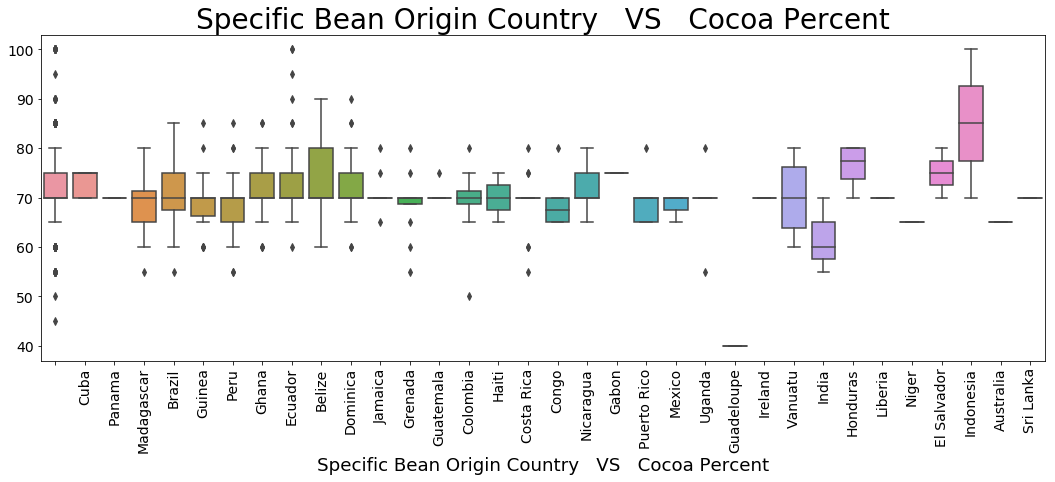

In [14]:
col1 = "Specific Bean Origin Country"
col2 = "Cocoa Percent"
c = 10
title = re.sub("[^a-zA-Z0-9]", " ", col1).title() + "   VS   " + re.sub("[^a-zA-Z0-9]", " ", col2).title()
xlabel = title
ylabel = ""

figsize = (18, 6)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

ax = sns.boxplot(x=col1, y=col2, data=df)
plt.title(title, fontsize=title_fontsize)
plt.xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
plt.ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
plt.xticks(fontsize=xtick_fontsize, rotation=90)
plt.yticks(fontsize=ytick_fontsize)

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 11 Text yticklabel objects>)

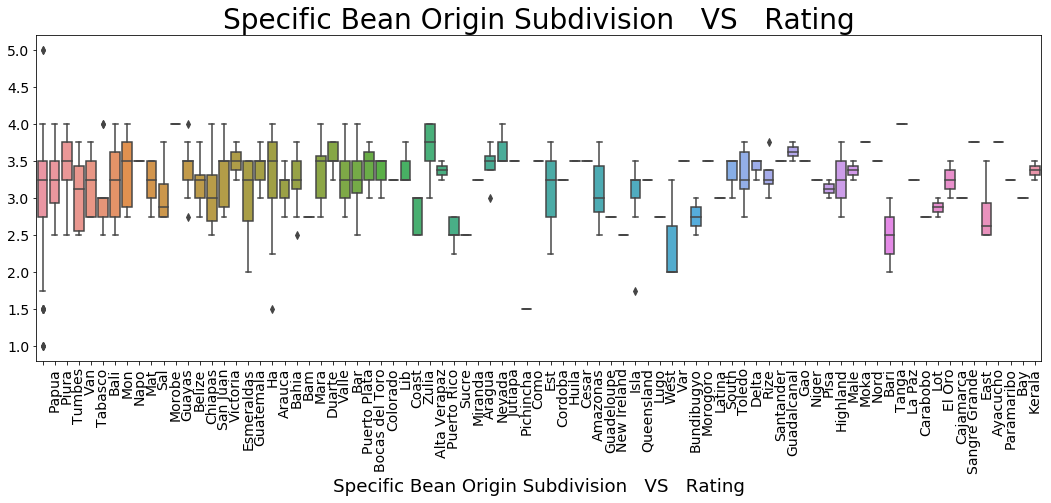

In [15]:
col1 = "Specific Bean Origin Subdivision"
col2 = "Rating"
c = 10
title = re.sub("[^a-zA-Z0-9]", " ", col1).title() + "   VS   " + re.sub("[^a-zA-Z0-9]", " ", col2).title()
xlabel = title
ylabel = ""

figsize = (18, 6)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

ax = sns.boxplot(x=col1, y=col2, data=df)
plt.title(title, fontsize=title_fontsize)
plt.xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
plt.ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
plt.xticks(fontsize=xtick_fontsize, rotation=90)
plt.yticks(fontsize=ytick_fontsize)

(array([ 30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 9 Text yticklabel objects>)

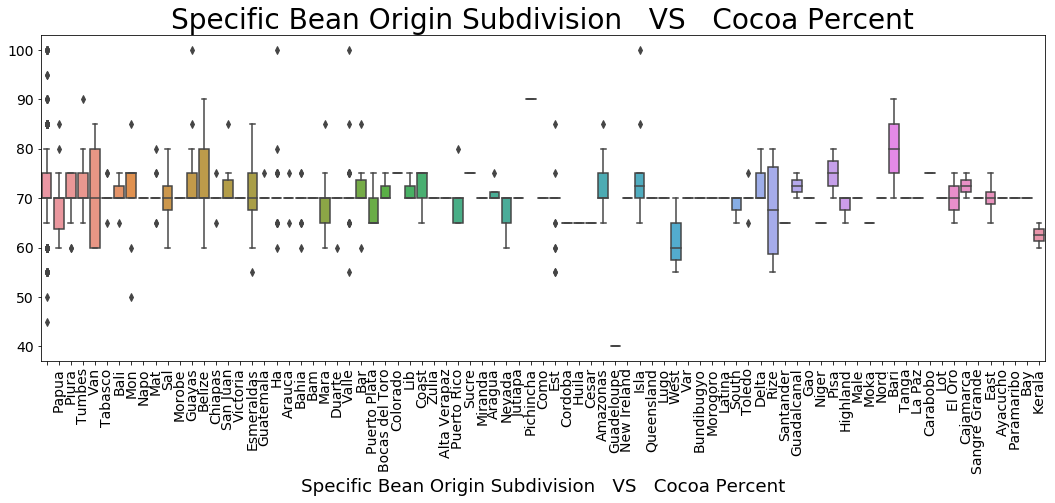

In [16]:
col1 = "Specific Bean Origin Subdivision"
col2 = "Cocoa Percent"
c = 10
title = re.sub("[^a-zA-Z0-9]", " ", col1).title() + "   VS   " + re.sub("[^a-zA-Z0-9]", " ", col2).title()
xlabel = title
ylabel = ""

figsize = (18, 6)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

ax = sns.boxplot(x=col1, y=col2, data=df)
plt.title(title, fontsize=title_fontsize)
plt.xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
plt.ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
plt.xticks(fontsize=xtick_fontsize, rotation=90)
plt.yticks(fontsize=ytick_fontsize)

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 11 Text yticklabel objects>)

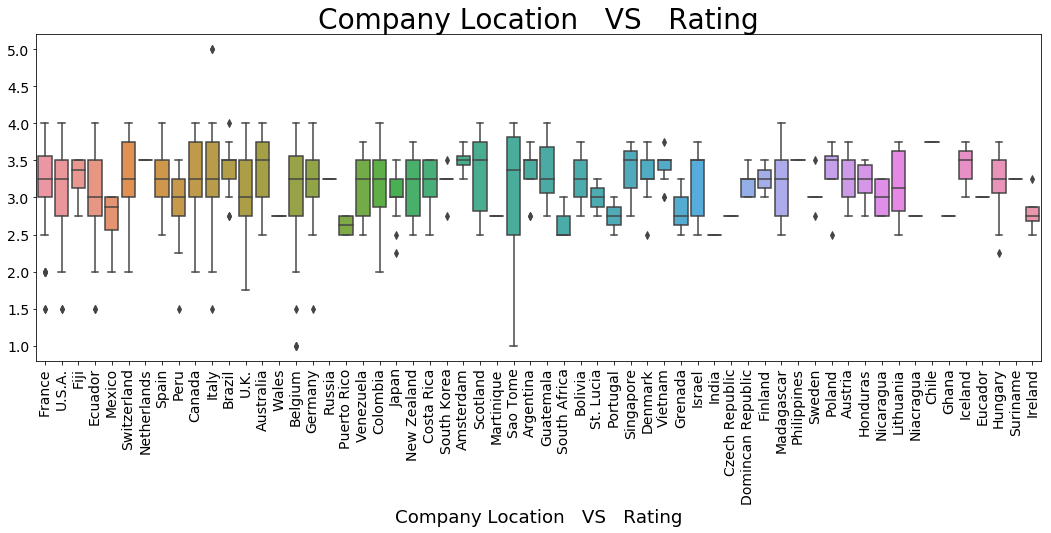

In [17]:
col1 = "Company\nLocation"
col2 = "Rating"
c = 10
title = re.sub("[^a-zA-Z0-9]", " ", col1).title() + "   VS   " + re.sub("[^a-zA-Z0-9]", " ", col2).title()
xlabel = title
ylabel = ""

figsize = (18, 6)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

ax = sns.boxplot(x=col1, y=col2, data=df)
plt.title(title, fontsize=title_fontsize)
plt.xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
plt.ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
plt.xticks(fontsize=xtick_fontsize, rotation=90)
plt.yticks(fontsize=ytick_fontsize)

(array([ 30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 9 Text yticklabel objects>)

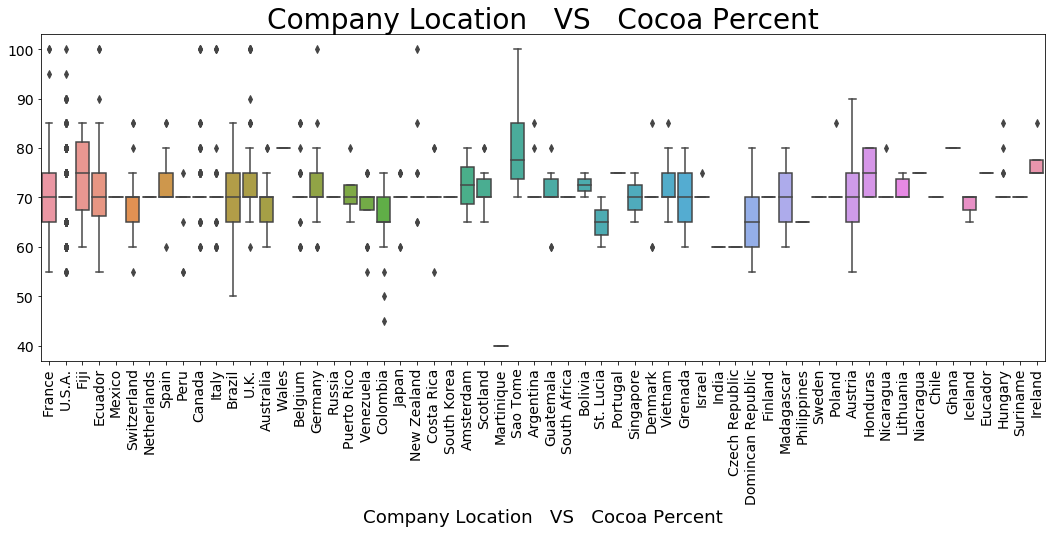

In [18]:
col1 = "Company\nLocation"
col2 = "Cocoa Percent"
c = 10
title = re.sub("[^a-zA-Z0-9]", " ", col1).title() + "   VS   " + re.sub("[^a-zA-Z0-9]", " ", col2).title()
xlabel = title
ylabel = ""

figsize = (18, 6)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

ax = sns.boxplot(x=col1, y=col2, data=df)
plt.title(title, fontsize=title_fontsize)
plt.xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
plt.ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
plt.xticks(fontsize=xtick_fontsize, rotation=90)
plt.yticks(fontsize=ytick_fontsize)

(array([ 30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 9 Text yticklabel objects>)

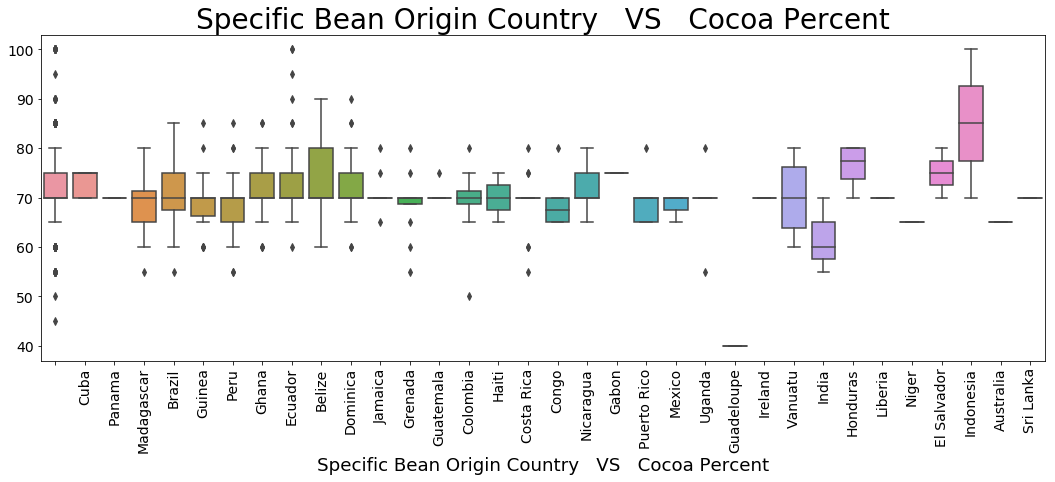

In [19]:
col1 = "Specific Bean Origin Country"
col2 = "Cocoa Percent"
c = 10
title = re.sub("[^a-zA-Z0-9]", " ", col1).title() + "   VS   " + re.sub("[^a-zA-Z0-9]", " ", col2).title()
xlabel = title
ylabel = ""

figsize = (18, 6)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

ax = sns.boxplot(x=col1, y=col2, data=df)
plt.title(title, fontsize=title_fontsize)
plt.xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
plt.ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
plt.xticks(fontsize=xtick_fontsize, rotation=90)
plt.yticks(fontsize=ytick_fontsize)

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 6 Text yticklabel objects>)

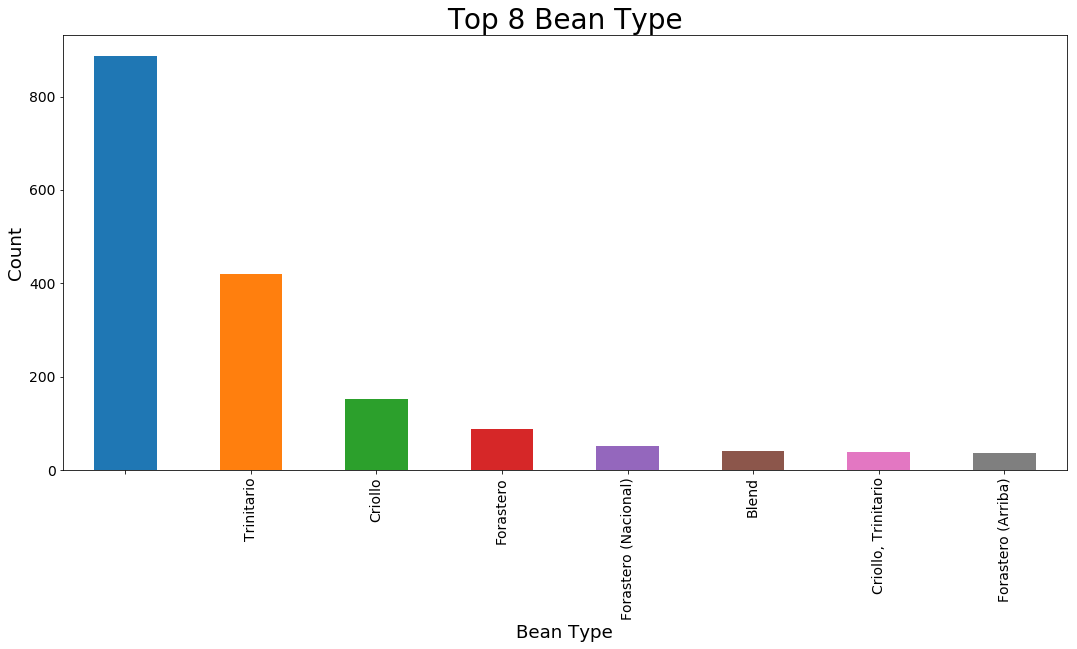

In [20]:
col = "Bean\nType"
c = 8
title = re.sub("[^a-zA-Z0-9]", " ", col).title()
xlabel = title
ylabel = "Count"

figsize = (18, 8)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

df[col].value_counts().sort_values(ascending=False).head(c).plot(kind = 'bar')
plt.title("Top " + str(c) + " " + title, fontsize=title_fontsize)
plt.xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
plt.ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
plt.xticks(fontsize=xtick_fontsize)
plt.yticks(fontsize=ytick_fontsize)

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 10 Text yticklabel objects>)

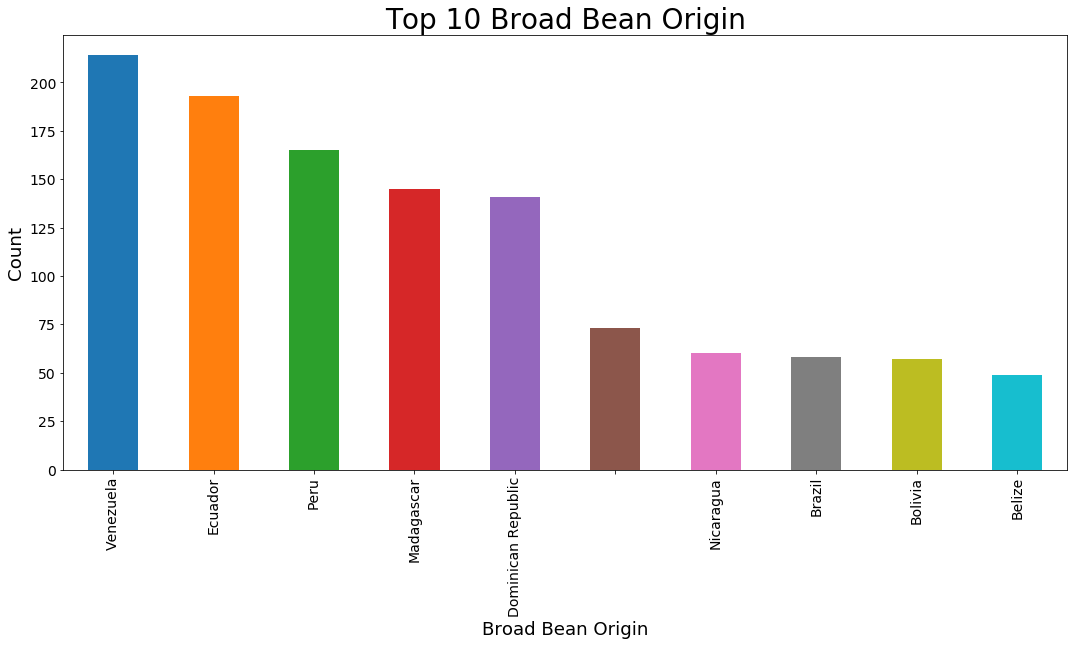

In [21]:
col = "Broad Bean\nOrigin"
c = 10
title = re.sub("[^a-zA-Z0-9]", " ", col).title()
xlabel = title
ylabel = "Count"

figsize = (18, 8)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

df[col].value_counts().sort_values(ascending=False).head(c).plot(kind = 'bar')
plt.title("Top " + str(c) + " " + title, fontsize=title_fontsize)
plt.xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
plt.ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
plt.xticks(fontsize=xtick_fontsize)
plt.yticks(fontsize=ytick_fontsize)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text yticklabel objects>)

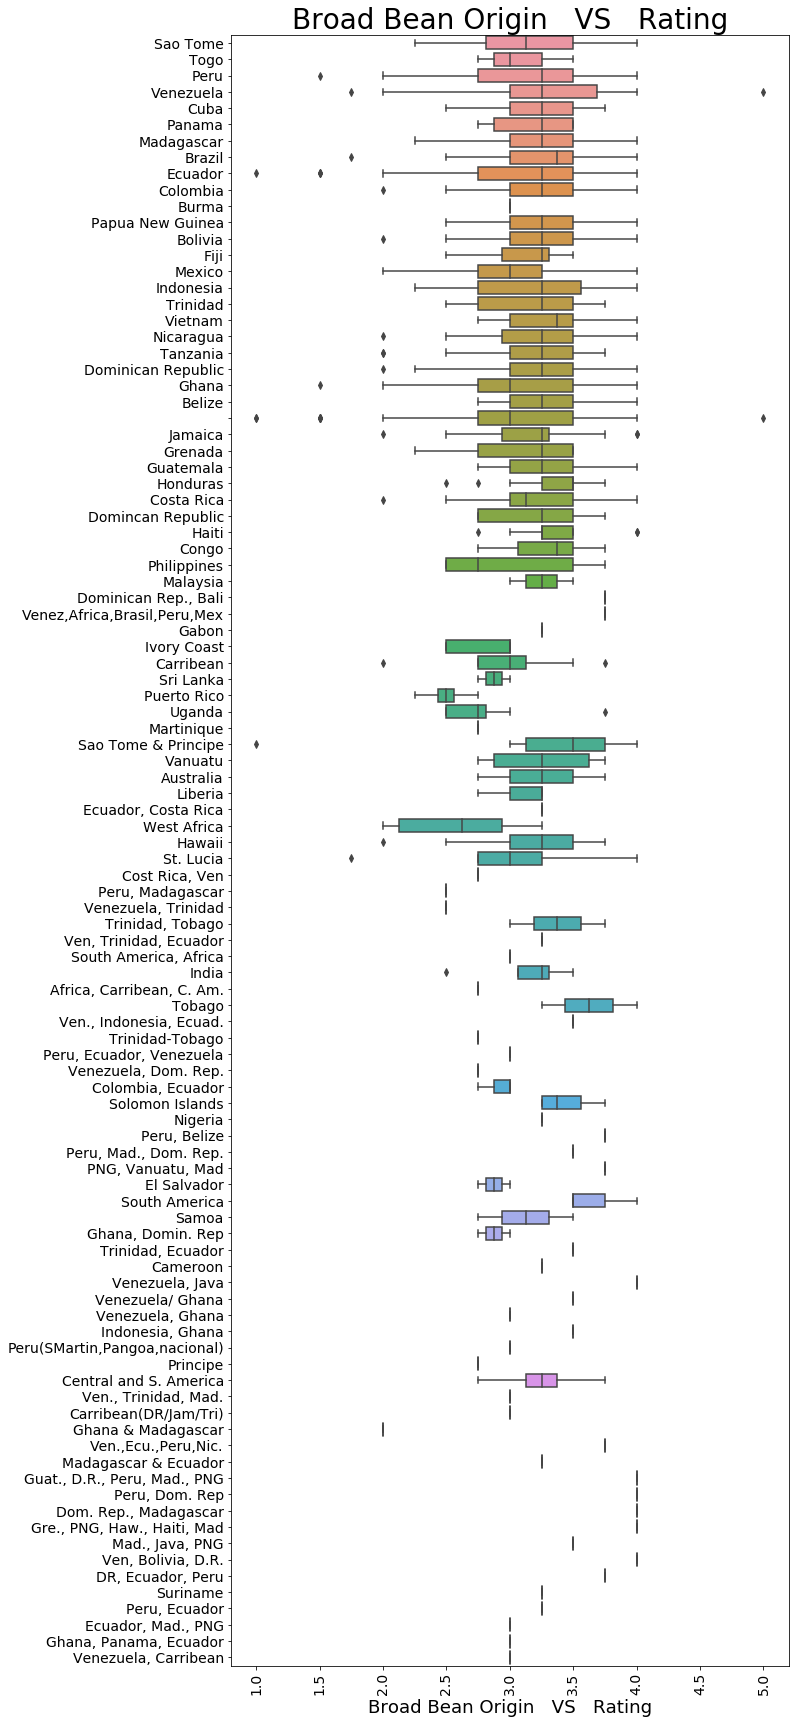

In [22]:
col1 = "Broad Bean\nOrigin"
col2 = "Rating"
c = 10
title = re.sub("[^a-zA-Z0-9]", " ", col1).title() + "   VS   " + re.sub("[^a-zA-Z0-9]", " ", col2).title()
xlabel = title
ylabel = ""

figsize = (10, 30)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

ax = sns.boxplot(x=col2, y=col1, data=df)
plt.title(title, fontsize=title_fontsize)
plt.xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
plt.ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
plt.xticks(fontsize=xtick_fontsize, rotation=90)
plt.yticks(fontsize=ytick_fontsize)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text yticklabel objects>)

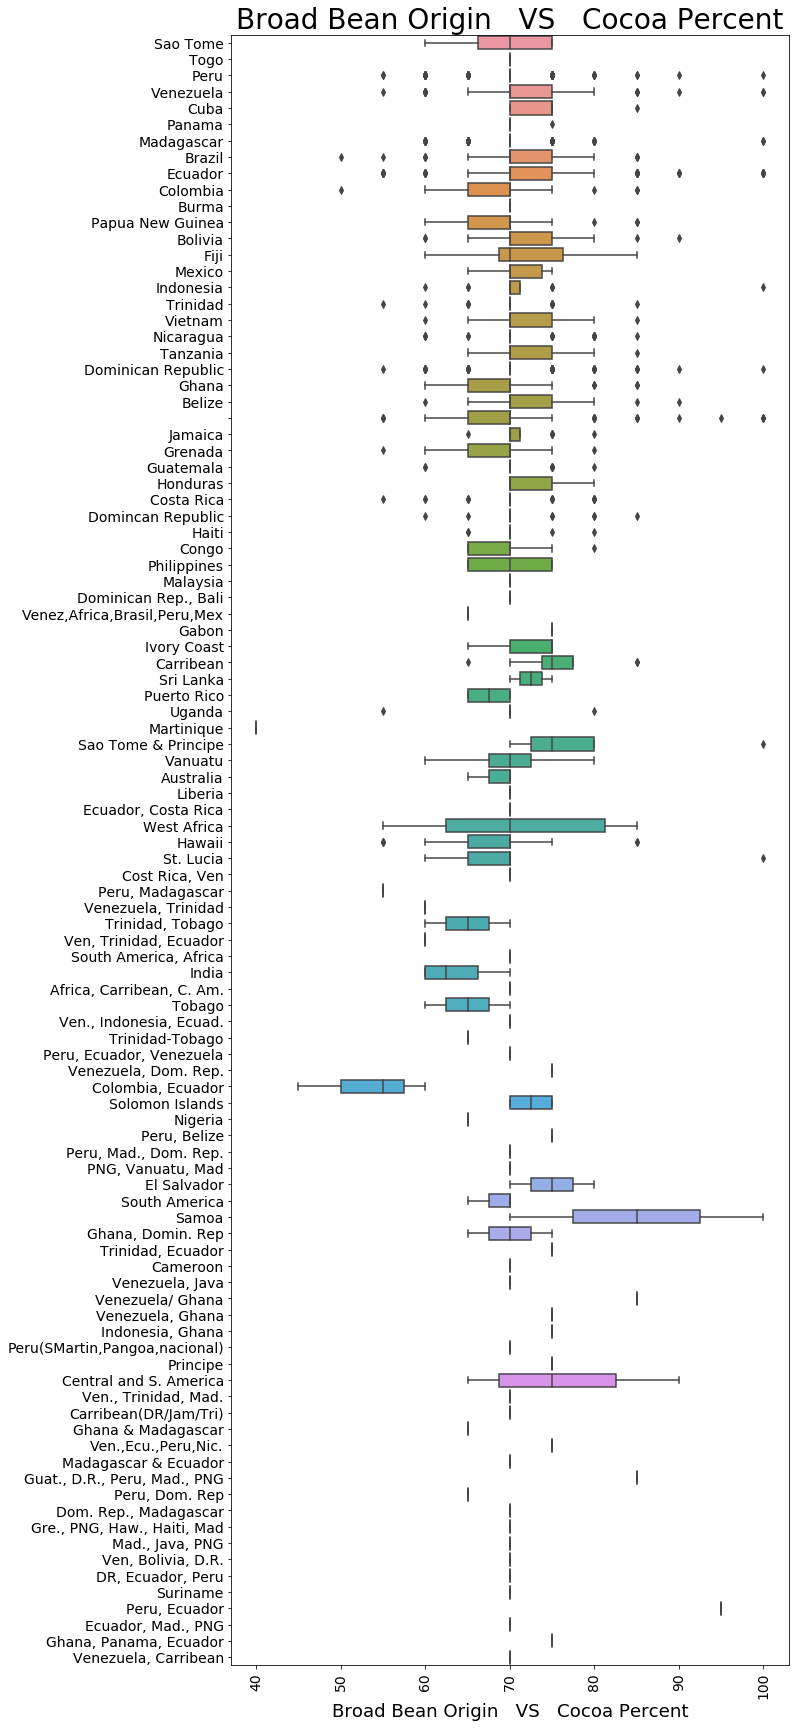

In [23]:
col1 = "Broad Bean\nOrigin"
col2 = "Cocoa Percent"
c = 10
title = re.sub("[^a-zA-Z0-9]", " ", col1).title() + "   VS   " + re.sub("[^a-zA-Z0-9]", " ", col2).title()
xlabel = title
ylabel = ""

figsize = (10, 30)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

ax = sns.boxplot(x=col2, y=col1, data=df)
plt.title(title, fontsize=title_fontsize)
plt.xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
plt.ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
plt.xticks(fontsize=xtick_fontsize, rotation=90)
plt.yticks(fontsize=ytick_fontsize)

<Figure size 1296x576 with 0 Axes>

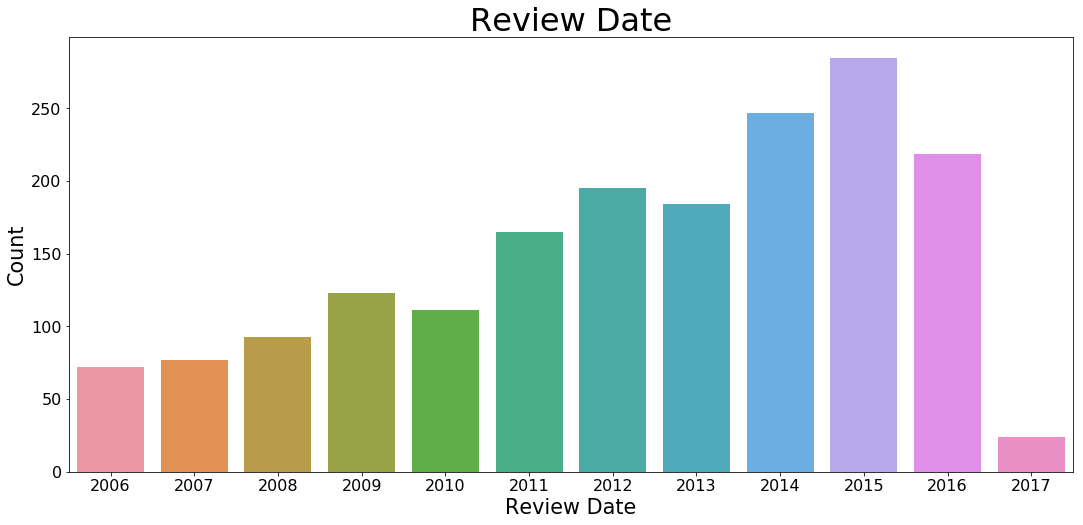

In [24]:
plt.figure(figsize=(18, 8))

col = "Review\nDate"
title = re.sub("[^a-zA-Z0-9]", " ", col).title()
xlabel = title
ylabel = "Count"

figsize = (18, 8)

fontsize = 16
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

ax = sns.countplot(df[col])
ax.set_title(title, fontsize=title_fontsize)
ax.set_xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
ax.set_ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
ax.tick_params(labelsize=xtick_fontsize)

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 11 Text yticklabel objects>)

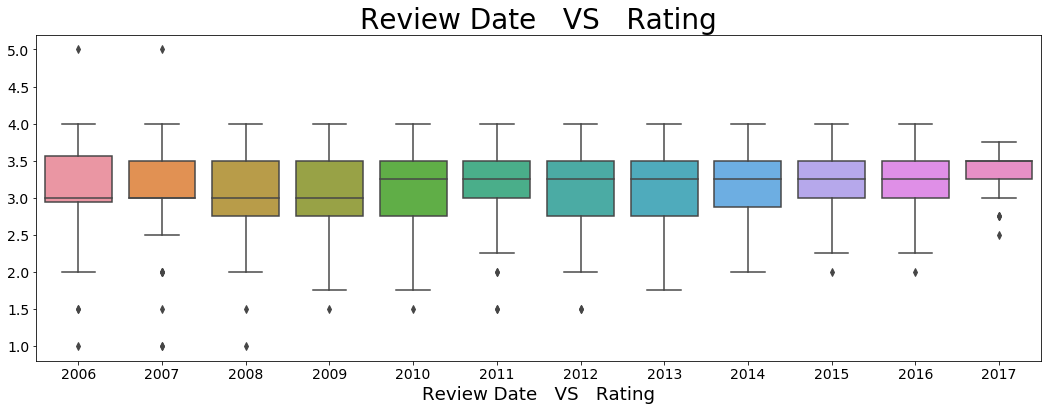

In [25]:
col1 = "Review\nDate"
col2 = "Rating"
c = 10
title = re.sub("[^a-zA-Z0-9]", " ", col1).title() + "   VS   " + re.sub("[^a-zA-Z0-9]", " ", col2).title()
xlabel = title
ylabel = ""

figsize = (18, 6)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

ax = sns.boxplot(x=col1, y=col2, data=df)
plt.title(title, fontsize=title_fontsize)
plt.xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
plt.ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
plt.xticks(fontsize=xtick_fontsize)
plt.yticks(fontsize=ytick_fontsize)

(array([ 30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 9 Text yticklabel objects>)

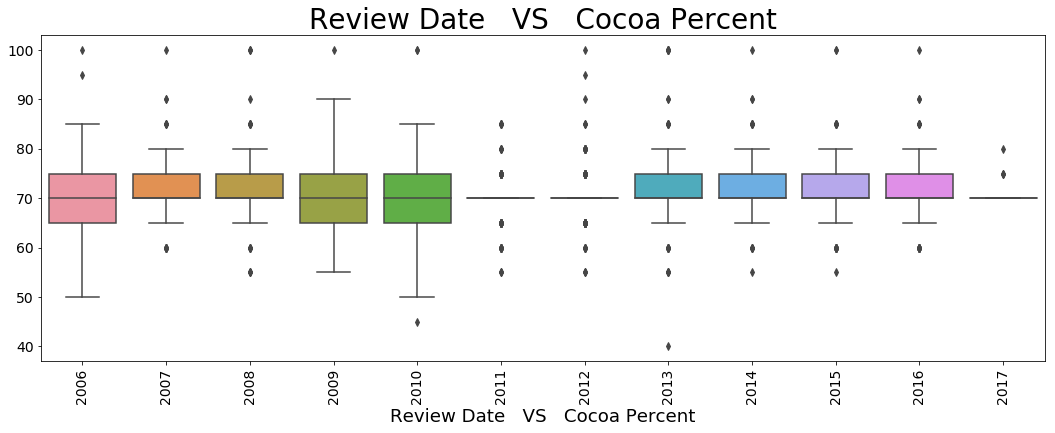

In [26]:
col1 = "Review\nDate"
col2 = "Cocoa Percent"
c = 10
title = re.sub("[^a-zA-Z0-9]", " ", col1).title() + "   VS   " + re.sub("[^a-zA-Z0-9]", " ", col2).title()
xlabel = title
ylabel = ""

figsize = (18, 6)

fontsize = 14
title_fontsize = fontsize*2
xlabel_fontsize = fontsize*1.3
ylabel_fontsize = fontsize*1.3
xtick_fontsize = fontsize
ytick_fontsize = fontsize


plt.figure(figsize=figsize)

ax = sns.boxplot(x=col1, y=col2, data=df)
plt.title(title, fontsize=title_fontsize)
plt.xlabel(xlabel=xlabel, fontsize=xlabel_fontsize)
plt.ylabel(ylabel=ylabel, fontsize=ylabel_fontsize)
plt.xticks(fontsize=xtick_fontsize, rotation=90)
plt.yticks(fontsize=ytick_fontsize)

In [27]:
cols = df.columns
cols = ['Rating', 'Bean\nType', 'Cocoa Percent', 'Specific Bean Origin Country', 'Specific Bean Origin Subdivision']
cols

['Rating',
 'Bean\nType',
 'Cocoa Percent',
 'Specific Bean Origin Country',
 'Specific Bean Origin Subdivision']